In [1]:
import numpy as np
import pandas as pd

In [2]:
import pathlib
import PIL
from glob import glob

In [46]:
import matplotlib.pyplot as plt
import random
import seaborn as sns

We will first organize the metadata and create the dataframes we need for the modeling phase and then look at some of the data in detail. 

Part 1: Organize Metadata 
- **Url DF**: WikiArt data- The information on each piece and the URL it's stored at(table used in scraping) 
- **Emotions DF**: Emotions associated with each artwork (used for building model) 
- **Top Emotion DF**: Emotion probability- Probability of each association associated with each artwork (in case of further need) 
- **Top Emotion Path DF**: Create the dataframe that lists the top emotion for each artwork and the pathway for the work, which will then be used for image loading with flow_from_dataframe function
- **All Emotions Path DF**: Similar dataframe binary coding each emotion for all the artworks. 

Part 2: EDA 
- Visualize some of the images
- Look at the distribution of target (emotions). 

## Part 1: Metadata & DataFrames ##

**a. URL DF: WikiArt Images/URL Table**

This is the DF we used for the scraping. 

In [5]:
url_df = pd.read_csv('dataset_WikiArt_Emotions/WikiArt-info.tsv', sep='\t')

In [6]:
url_df.columns

Index(['ID', 'Category', 'Artist', 'Title', 'Year', 'Image URL',
       'Painting Info URL', 'Artist Info URL'],
      dtype='object')

In [7]:
url_df.head(3)

,ID,Category,Artist,Title,Year,Image URL,Painting Info URL,Artist Info URL
0,58c6237dedc2c9c7dc0de1ae,Impressionism,Charles Courtney Curran,In the Luxembourg Garden,1889,https://uploads3.wikiart.org/00123/images/char...,https://www.wikiart.org/en/charles-courtney-cu...,https://www.wikiart.org/en/charles-courtney-cu...
1,577280dfedc2cb3880f28e76,Neo-Expressionism,Keith Haring,The Marriage of Heaven and Hell,1984,https://uploads1.wikiart.org/images/keith-hari...,https://www.wikiart.org/en/keith-haring/the-ma...,https://www.wikiart.org/en/keith-haring
2,57727f2dedc2cb3880ed5fa9,Post-Impressionism,Jozsef Rippl-Ronai,Uncle Piacsek in front of the Black Sideboard,1906,https://uploads3.wikiart.org/images/j-zsef-rip...,https://www.wikiart.org/en/jozsef-rippl-ronai/...,https://www.wikiart.org/en/jozsef-rippl-ronai


**b. EMOTIONS DF: All Emotions Table**

Let's first look at the difference between the three emotion tables. 

In [8]:
emotions_df_5 = pd.read_csv('dataset_WikiArt_Emotions/WikiArt-Emotions-Ag5.tsv', sep='\t')

In [9]:
emotions_df_5.head(3)

,ID,Style,Category,Artist,Title,Year,Is painting,Face/body,Ave. art rating,Art (image+title): agreeableness,...,TitleOnly: love,TitleOnly: optimism,TitleOnly: pessimism,TitleOnly: regret,TitleOnly: sadness,TitleOnly: shame,TitleOnly: shyness,TitleOnly: surprise,TitleOnly: trust,TitleOnly: neutral
0,58c6237dedc2c9c7dc0de1ae,Modern Art,Impressionism,Charles Courtney Curran,In the Luxembourg Garden,1889,yes,face,2.33,0,...,0,0,0,0,0,0,0,0,0,0
1,577280dfedc2cb3880f28e76,Modern Art,Neo-Expressionism,Keith Haring,The Marriage of Heaven and Hell,1984,yes,body,0.70,0,...,0,0,0,0,0,0,0,0,0,0
2,57727f2dedc2cb3880ed5fa9,Modern Art,Post-Impressionism,Jozsef Rippl-Ronai,Uncle Piacsek in front of the Black Sideboard,1906,yes,face,1.60,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
emotions_df_3 = pd.read_csv('dataset_WikiArt_Emotions/WikiArt-Emotions-Ag3.tsv', sep='\t')

In [11]:
emotions_df_4 = pd.read_csv('dataset_WikiArt_Emotions/WikiArt-Emotions-Ag4.tsv', sep='\t')

In [12]:
print(emotions_df_3.equals(emotions_df_5))
print(emotions_df_4.equals(emotions_df_5))
print(emotions_df_4.equals(emotions_df_3))

False
False
False


In [14]:
diff_3_5 = emotions_df_3.eq(emotions_df_5)
diff_3_5.head(10)

,ID,Style,Category,Artist,Title,Year,Is painting,Face/body,Ave. art rating,Art (image+title): agreeableness,...,TitleOnly: love,TitleOnly: optimism,TitleOnly: pessimism,TitleOnly: regret,TitleOnly: sadness,TitleOnly: shame,TitleOnly: shyness,TitleOnly: surprise,TitleOnly: trust,TitleOnly: neutral
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,False,True
5,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
6,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,False,True,True,True,True,True
7,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
8,True,True,True,True,True,True,True,True,True,True,...,True,True,False,True,True,True,True,True,True,True
9,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [15]:
diff_3_5["TitleOnly: optimism"].value_counts()

True     3765
False     340
Name: TitleOnly: optimism, dtype: int64

In [18]:
diff_4_5 = emotions_df_4.eq(emotions_df_5)
diff_4_5.head(10)

,ID,Style,Category,Artist,Title,Year,Is painting,Face/body,Ave. art rating,Art (image+title): agreeableness,...,TitleOnly: love,TitleOnly: optimism,TitleOnly: pessimism,TitleOnly: regret,TitleOnly: sadness,TitleOnly: shame,TitleOnly: shyness,TitleOnly: surprise,TitleOnly: trust,TitleOnly: neutral
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
5,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
6,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
7,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
8,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
9,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [19]:
diff_4_5["TitleOnly: optimism"].value_counts()

True     4027
False      78
Name: TitleOnly: optimism, dtype: int64

In [21]:
diff_3_4 = emotions_df_3.eq(emotions_df_4)
diff_3_4.head(10)

,ID,Style,Category,Artist,Title,Year,Is painting,Face/body,Ave. art rating,Art (image+title): agreeableness,...,TitleOnly: love,TitleOnly: optimism,TitleOnly: pessimism,TitleOnly: regret,TitleOnly: sadness,TitleOnly: shame,TitleOnly: shyness,TitleOnly: surprise,TitleOnly: trust,TitleOnly: neutral
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,False,True
5,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
6,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,False,True,True,True,True,True
7,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
8,True,True,True,True,True,True,True,True,True,True,...,True,True,False,True,True,True,True,True,True,True
9,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [22]:
diff_3_4["TitleOnly: optimism"].value_counts()

True     3843
False     262
Name: TitleOnly: optimism, dtype: int64

As we read in Saif M. Mohammad and Svetlana Kiritchenko's paper, the difference between these 3 datasets is what they take to be the majority vote. In Agg3, 30% of the people agree that a certain emotion is evoked; while in Agg5, 50% of the people agree on this. So taking the lower boundary will mean that the possibility of a certain emotion being evoked is higher. We'll go with that for our machine learning purposes. 

In this case, we will look at the emotion evoked when the annotator both knew the title and had seen the image (the painting). 

In [24]:
emotions_df_3.columns

Index(['ID', 'Style', 'Category', 'Artist', 'Title', 'Year', 'Is painting',
       'Face/body', 'Ave. art rating', 'Art (image+title): agreeableness',
       'Art (image+title): anger', 'Art (image+title): anticipation',
       'Art (image+title): arrogance', 'Art (image+title): disagreeableness',
       'Art (image+title): disgust', 'Art (image+title): fear',
       'Art (image+title): gratitude', 'Art (image+title): happiness',
       'Art (image+title): humility', 'Art (image+title): love',
       'Art (image+title): optimism', 'Art (image+title): pessimism',
       'Art (image+title): regret', 'Art (image+title): sadness',
       'Art (image+title): shame', 'Art (image+title): shyness',
       'Art (image+title): surprise', 'Art (image+title): trust',
       'Art (image+title): neutral', 'ImageOnly: agreeableness',
       'ImageOnly: anger', 'ImageOnly: anticipation', 'ImageOnly: arrogance',
       'ImageOnly: disagreeableness', 'ImageOnly: disgust', 'ImageOnly: fear',
       'Imag

In [25]:
emotions_overall = emotions_df_3[['ID', 'Style', 'Category', 'Artist', 'Title', 'Is painting',
       'Face/body', 'Art (image+title): agreeableness',
       'Art (image+title): anger', 'Art (image+title): anticipation',
       'Art (image+title): arrogance', 'Art (image+title): disagreeableness',
       'Art (image+title): disgust', 'Art (image+title): fear',
       'Art (image+title): gratitude', 'Art (image+title): happiness',
       'Art (image+title): humility', 'Art (image+title): love',
       'Art (image+title): optimism', 'Art (image+title): pessimism',
       'Art (image+title): regret', 'Art (image+title): sadness',
       'Art (image+title): shame', 'Art (image+title): shyness',
       'Art (image+title): surprise', 'Art (image+title): trust',
       'Art (image+title): neutral']]
emotions_overall.head(3)

,ID,Style,Category,Artist,Title,Is painting,Face/body,Art (image+title): agreeableness,Art (image+title): anger,Art (image+title): anticipation,...,Art (image+title): love,Art (image+title): optimism,Art (image+title): pessimism,Art (image+title): regret,Art (image+title): sadness,Art (image+title): shame,Art (image+title): shyness,Art (image+title): surprise,Art (image+title): trust,Art (image+title): neutral
0,58c6237dedc2c9c7dc0de1ae,Modern Art,Impressionism,Charles Courtney Curran,In the Luxembourg Garden,yes,face,0,0,0,...,1,1,0,0,0,0,0,0,0,0
1,577280dfedc2cb3880f28e76,Modern Art,Neo-Expressionism,Keith Haring,The Marriage of Heaven and Hell,yes,body,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,57727f2dedc2cb3880ed5fa9,Modern Art,Post-Impressionism,Jozsef Rippl-Ronai,Uncle Piacsek in front of the Black Sideboard,yes,face,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [26]:
emotions_overall.sum(axis = 1).unique()

<ipython-input-26-a9f5d7997f1f>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  emotions_overall.sum(axis = 1).unique()


array([4, 0, 3, 2, 1, 5, 7, 6, 8])

This is the number of emotions associated with each artwork: There are at least 0 and at most 5 emotions associated with an artwork. 

In [27]:
#Rename columns
emotions = emotions_overall.rename(columns={'Art (image+title): agreeableness': 'agreeableness',
       'Art (image+title): anger': "anger", 'Art (image+title): anticipation': "anticipation",
       'Art (image+title): arrogance':"arrogance", 'Art (image+title): disagreeableness':"disagreeableness",
       'Art (image+title): disgust':"disgust", 'Art (image+title): fear':"fear",
       'Art (image+title): gratitude':"gratitude", 'Art (image+title): happiness':"happiness",
       'Art (image+title): humility':"humility", 'Art (image+title): love':"love",
       'Art (image+title): optimism':"optimism", 'Art (image+title): pessimism':"pessimism",
       'Art (image+title): regret':"regret", 'Art (image+title): sadness':"sadness",
       'Art (image+title): shame':"shame", 'Art (image+title): shyness':"shyness",
       'Art (image+title): surprise':"surprise", 'Art (image+title): trust':"trust",
       'Art (image+title): neutral':"neutral"})
emotions.head(1)

,ID,Style,Category,Artist,Title,Is painting,Face/body,agreeableness,anger,anticipation,...,love,optimism,pessimism,regret,sadness,shame,shyness,surprise,trust,neutral
0,58c6237dedc2c9c7dc0de1ae,Modern Art,Impressionism,Charles Courtney Curran,In the Luxembourg Garden,yes,face,0,0,0,...,1,1,0,0,0,0,0,0,0,0


**c. TOP EMOTION DF: Probability of Emotions/Top Emotion Table**

In [28]:
prob_df = pd.read_csv('dataset_WikiArt_Emotions/WikiArt-Emotions-All.tsv', sep='\t')

In [29]:
prob_df.head(3)

,ID,Style,Category,Artist,Title,Year,Is painting,Face/body,Ave. art rating,Art (image+title): agreeableness,...,TitleOnly: love,TitleOnly: optimism,TitleOnly: pessimism,TitleOnly: regret,TitleOnly: sadness,TitleOnly: shame,TitleOnly: shyness,TitleOnly: surprise,TitleOnly: trust,TitleOnly: neutral
0,58c6237dedc2c9c7dc0de1ae,Modern Art,Impressionism,Charles Courtney Curran,In the Luxembourg Garden,1889,yes,face,2.33,0.036,...,0.155,0.238,0.024,0.012,0.024,0.012,0.0,0.048,0.155,0.0
1,577280dfedc2cb3880f28e76,Modern Art,Neo-Expressionism,Keith Haring,The Marriage of Heaven and Hell,1984,yes,body,0.70,0.000,...,0.200,0.000,0.100,0.000,0.000,0.000,0.0,0.200,0.000,0.0
2,57727f2dedc2cb3880ed5fa9,Modern Art,Post-Impressionism,Jozsef Rippl-Ronai,Uncle Piacsek in front of the Black Sideboard,1906,yes,face,1.60,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.100,0.100,0.0


In [30]:
prob_df2 = prob_df.copy()

In [31]:
prob_df3 = prob_df2[['ID', 'Artist', 'Title','Art (image+title): agreeableness',
       'Art (image+title): anger', 'Art (image+title): anticipation',
       'Art (image+title): arrogance', 'Art (image+title): disagreeableness',
       'Art (image+title): disgust', 'Art (image+title): fear',
       'Art (image+title): gratitude', 'Art (image+title): happiness',
       'Art (image+title): humility', 'Art (image+title): love',
       'Art (image+title): optimism', 'Art (image+title): pessimism',
       'Art (image+title): regret', 'Art (image+title): sadness',
       'Art (image+title): shame', 'Art (image+title): shyness',
       'Art (image+title): surprise', 'Art (image+title): trust',
       'Art (image+title): neutral']]
prob_df3.head(3)

,ID,Artist,Title,Art (image+title): agreeableness,Art (image+title): anger,Art (image+title): anticipation,Art (image+title): arrogance,Art (image+title): disagreeableness,Art (image+title): disgust,Art (image+title): fear,...,Art (image+title): love,Art (image+title): optimism,Art (image+title): pessimism,Art (image+title): regret,Art (image+title): sadness,Art (image+title): shame,Art (image+title): shyness,Art (image+title): surprise,Art (image+title): trust,Art (image+title): neutral
0,58c6237dedc2c9c7dc0de1ae,Charles Courtney Curran,In the Luxembourg Garden,0.036,0.012,0.071,0.012,0.012,0.0,0.036,...,0.357,0.333,0.048,0.024,0.131,0.0,0.012,0.048,0.274,0.0
1,577280dfedc2cb3880f28e76,Keith Haring,The Marriage of Heaven and Hell,0.000,0.000,0.500,0.000,0.400,0.1,0.300,...,0.100,0.100,0.200,0.100,0.100,0.0,0.000,0.500,0.100,0.0
2,57727f2dedc2cb3880ed5fa9,Jozsef Rippl-Ronai,Uncle Piacsek in front of the Black Sideboard,0.000,0.000,0.200,0.000,0.000,0.0,0.000,...,0.000,0.300,0.000,0.000,0.000,0.0,0.000,0.100,0.300,0.0


In [32]:
#Rename columns
top_emotion = prob_df3.rename(columns={'Art (image+title): agreeableness': 'agreeableness',
       'Art (image+title): anger': "anger", 'Art (image+title): anticipation': "anticipation",
       'Art (image+title): arrogance':"arrogance", 'Art (image+title): disagreeableness':"disagreeableness",
       'Art (image+title): disgust':"disgust", 'Art (image+title): fear':"fear",
       'Art (image+title): gratitude':"gratitude", 'Art (image+title): happiness':"happiness",
       'Art (image+title): humility':"humility", 'Art (image+title): love':"love",
       'Art (image+title): optimism':"optimism", 'Art (image+title): pessimism':"pessimism",
       'Art (image+title): regret':"regret", 'Art (image+title): sadness':"sadness",
       'Art (image+title): shame':"shame", 'Art (image+title): shyness':"shyness",
       'Art (image+title): surprise':"surprise", 'Art (image+title): trust':"trust",
       'Art (image+title): neutral':"neutral"})
top_emotion.head(1)

,ID,Artist,Title,agreeableness,anger,anticipation,arrogance,disagreeableness,disgust,fear,...,love,optimism,pessimism,regret,sadness,shame,shyness,surprise,trust,neutral
0,58c6237dedc2c9c7dc0de1ae,Charles Courtney Curran,In the Luxembourg Garden,0.036,0.012,0.071,0.012,0.012,0.0,0.036,...,0.357,0.333,0.048,0.024,0.131,0.0,0.012,0.048,0.274,0.0


In [33]:
#Create column with top emotion associated with artwork 
prob_df4 = top_emotion.loc[:, ('agreeableness', 'anger', 'anticipation','arrogance', 'disagreeableness',
       'disgust', 'fear','gratitude', 'happiness', 'humility', 'love',
       'optimism', 'pessimism','regret', 'sadness','shame', 'shyness',
       'surprise', 'trust','neutral')]
specific = prob_df4.idxmax(axis = 1)
prob_df4["emotion"] = specific
prob_df4.head(1)

,agreeableness,anger,anticipation,arrogance,disagreeableness,disgust,fear,gratitude,happiness,humility,...,optimism,pessimism,regret,sadness,shame,shyness,surprise,trust,neutral,emotion
0,0.036,0.012,0.071,0.012,0.012,0.0,0.036,0.131,0.75,0.357,...,0.333,0.048,0.024,0.131,0.0,0.012,0.048,0.274,0.0,happiness


In [34]:
top_emotion["emotion"] = prob_df4["emotion"]
top_emotion.head(1)

,ID,Artist,Title,agreeableness,anger,anticipation,arrogance,disagreeableness,disgust,fear,...,optimism,pessimism,regret,sadness,shame,shyness,surprise,trust,neutral,emotion
0,58c6237dedc2c9c7dc0de1ae,Charles Courtney Curran,In the Luxembourg Garden,0.036,0.012,0.071,0.012,0.012,0.0,0.036,...,0.333,0.048,0.024,0.131,0.0,0.012,0.048,0.274,0.0,happiness


**d. TOP EMOTION PATH DF: Top Emotion for an Artwork / Pathway to the Artwork File**

In [35]:
# Create image path DF
path = "dataset_images/"

In [36]:
path_prob = top_emotion.copy()
path_prob = path_prob.loc[:, ("ID", "emotion")]

In [37]:
path_prob["path"] = path + path_prob.ID.astype(str) + ".png"
path_prob.head(1)

,ID,emotion,path
0,58c6237dedc2c9c7dc0de1ae,happiness,dataset_images/58c6237dedc2c9c7dc0de1ae.png


**e. ALL EMOTIONS PATH DF: All Emotions of an Artwork / Pathway to the Artwork File**

In [38]:
# Create image path DF
path = "dataset_images/"

In [39]:
emotions.head(1)

,ID,Style,Category,Artist,Title,Is painting,Face/body,agreeableness,anger,anticipation,...,love,optimism,pessimism,regret,sadness,shame,shyness,surprise,trust,neutral
0,58c6237dedc2c9c7dc0de1ae,Modern Art,Impressionism,Charles Courtney Curran,In the Luxembourg Garden,yes,face,0,0,0,...,1,1,0,0,0,0,0,0,0,0


In [40]:
path_all = emotions.copy()
path_all["path"] = path + path_all.ID.astype(str) + ".png"
path_all.head(1)

,ID,Style,Category,Artist,Title,Is painting,Face/body,agreeableness,anger,anticipation,...,optimism,pessimism,regret,sadness,shame,shyness,surprise,trust,neutral,path
0,58c6237dedc2c9c7dc0de1ae,Modern Art,Impressionism,Charles Courtney Curran,In the Luxembourg Garden,yes,face,0,0,0,...,1,0,0,0,0,0,0,0,0,dataset_images/58c6237dedc2c9c7dc0de1ae.png


## Part 2: EDA ##

**a. Size of dataset**

In [41]:
data_dir = pathlib.Path("dataset_images/")

In [42]:
emo = list(data_dir.glob('**/*.png'))
image_count = len(emo)
print(f"Number of images in the whole directory is {image_count}.")

Number of images in the whole directory is 4119.


**b. Look at a few images & their sizes**

<ipython-input-50-7f4c6c22be90>:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  images.show();


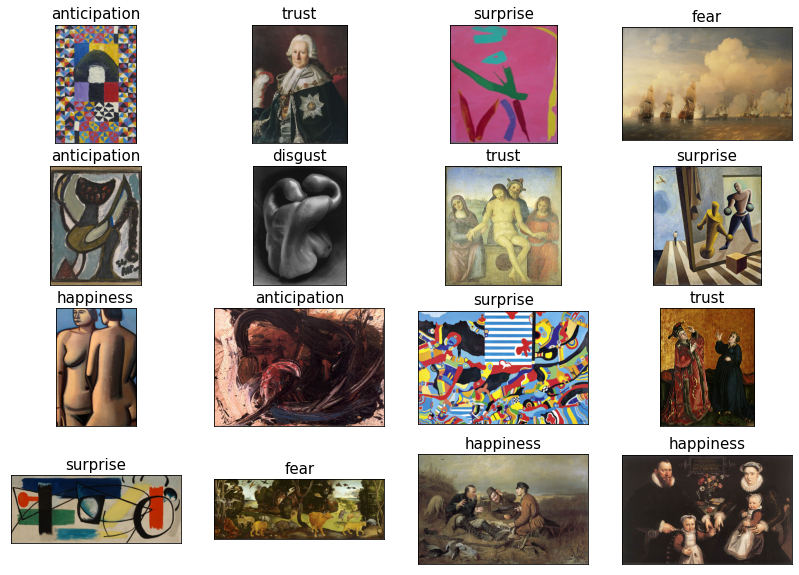

In [50]:
images = plt.figure(figsize = (14,10))
for i in range(16):
    random = np.random.randint(1,image_count)
    pic = np.array(PIL.Image.open(path_prob.loc[random,"path"]))
    plt.subplot(4, 4,i+1)
    plt.imshow(pic)
    plt.title(path_prob.loc[random, "emotion"], size = 15) 
    plt.xticks([])
    plt.yticks([])
    
images.show()
images.savefig("EDA_images_show.png", bbox_inches='tight', dpi = 250)

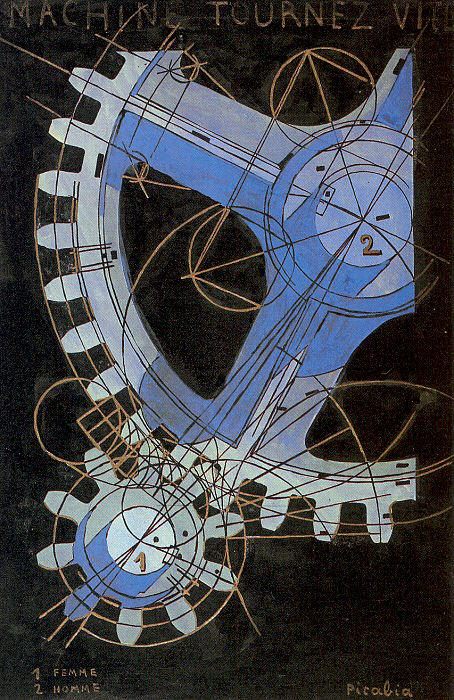

In [57]:
im_0 = PIL.Image.open(str(emo[0]))
im_0

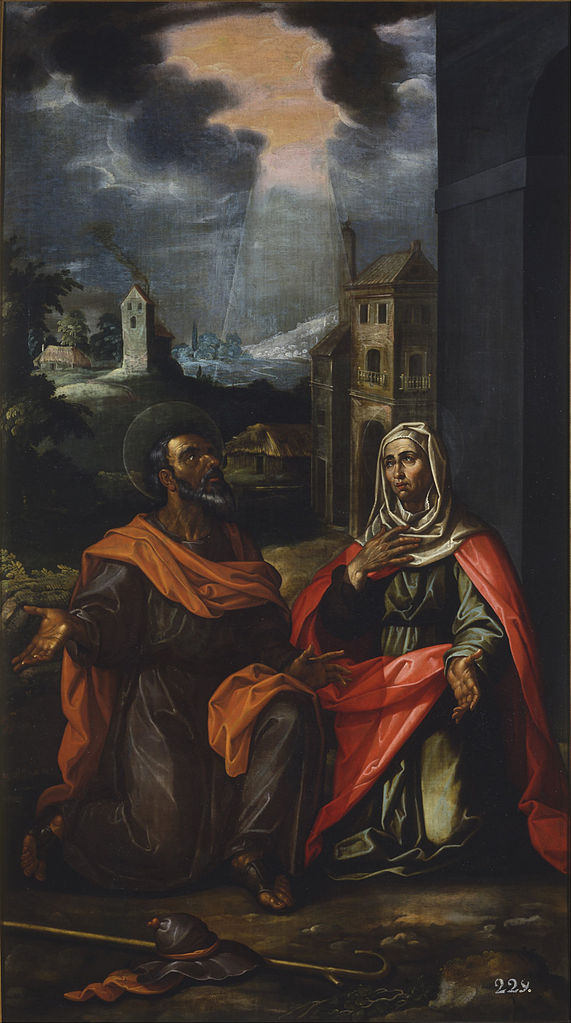

In [58]:
im_5 = PIL.Image.open(str(emo[5]))
im_5

**c. Look at target in top emotion DF**

In [59]:
path_prob.emotion.value_counts()

happiness           1102
surprise             822
anticipation         520
trust                478
fear                 358
sadness              226
humility             184
love                 114
disgust              101
optimism              62
arrogance             52
anger                 36
gratitude             14
pessimism             10
shame                  7
disagreeableness       7
neutral                5
agreeableness          5
shyness                2
Name: emotion, dtype: int64

In [65]:
emotions = ['agreeableness', 'anger', 'anticipation','arrogance', 'disagreeableness',
       'disgust', 'fear','gratitude', 'happiness', 'humility', 'love',
       'optimism', 'pessimism','regret', 'sadness','shame', 'shyness',
       'surprise', 'trust','neutral']

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


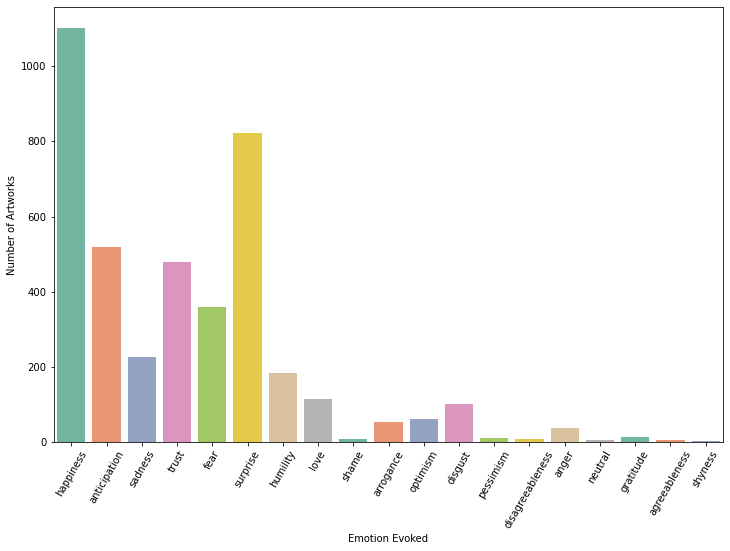

In [95]:
g = plt.figure(figsize=(12, 8))
g = sns.countplot(path_prob.emotion, palette = "Set2")
g.set(xlabel ='Emotion Evoked', ylabel='Number of Artworks')
plt.xticks(rotation=60)
plt.savefig("Emotion Evoked by Number of Artworks.png", bbox_inches='tight', dpi = 250)

In [64]:
#path_prob.to_csv("path_prob.csv")

**d. Look at target in all emotions DF**

In [72]:
path_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4105 entries, 0 to 4104
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                4105 non-null   object
 1   Style             4105 non-null   object
 2   Category          4105 non-null   object
 3   Artist            4105 non-null   object
 4   Title             4105 non-null   object
 5   Is painting       4105 non-null   object
 6   Face/body         4105 non-null   object
 7   agreeableness     4105 non-null   int64 
 8   anger             4105 non-null   int64 
 9   anticipation      4105 non-null   int64 
 10  arrogance         4105 non-null   int64 
 11  disagreeableness  4105 non-null   int64 
 12  disgust           4105 non-null   int64 
 13  fear              4105 non-null   int64 
 14  gratitude         4105 non-null   int64 
 15  happiness         4105 non-null   int64 
 16  humility          4105 non-null   int64 
 17  love          

In [73]:
emotion_counts = path_all.iloc[:, 7:27].sum()
emotion_counts

agreeableness         10
anger                 78
anticipation        1002
arrogance            131
disagreeableness      27
disgust              206
fear                 546
gratitude            116
happiness           1624
humility             773
love                 395
optimism             569
pessimism            103
regret                30
sadness              509
shame                 57
shyness                5
surprise            1358
trust               1083
neutral                5
dtype: int64

In [74]:
path_all.columns

Index(['ID', 'Style', 'Category', 'Artist', 'Title', 'Is painting',
       'Face/body', 'agreeableness', 'anger', 'anticipation', 'arrogance',
       'disagreeableness', 'disgust', 'fear', 'gratitude', 'happiness',
       'humility', 'love', 'optimism', 'pessimism', 'regret', 'sadness',
       'shame', 'shyness', 'surprise', 'trust', 'neutral', 'path'],
      dtype='object')

In [75]:
emotion_counts = path_all.iloc[:, 7:27].sum()
emotion_counts

agreeableness         10
anger                 78
anticipation        1002
arrogance            131
disagreeableness      27
disgust              206
fear                 546
gratitude            116
happiness           1624
humility             773
love                 395
optimism             569
pessimism            103
regret                30
sadness              509
shame                 57
shyness                5
surprise            1358
trust               1083
neutral                5
dtype: int64

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


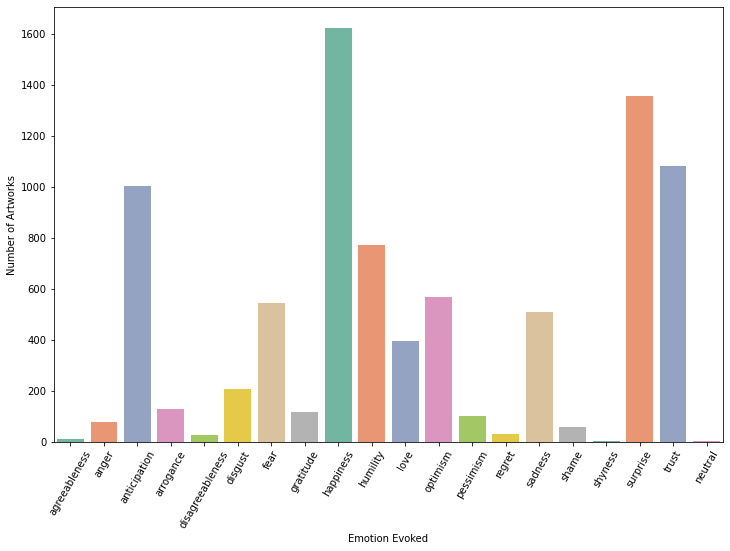

In [96]:
g = plt.figure(figsize=(12, 8))
g = sns.barplot(emotion_counts.index, emotion_counts.values, palette = "Set2")
g.set(xlabel ='Emotion Evoked', ylabel='Number of Artworks')
plt.xticks(rotation=60)
plt.savefig("All Emotions Evoked by Number of Artworks.png", bbox_inches='tight', dpi = 250)

In [78]:
path_all.head(2)

,ID,Style,Category,Artist,Title,Is painting,Face/body,agreeableness,anger,anticipation,...,optimism,pessimism,regret,sadness,shame,shyness,surprise,trust,neutral,path
0,58c6237dedc2c9c7dc0de1ae,Modern Art,Impressionism,Charles Courtney Curran,In the Luxembourg Garden,yes,face,0,0,0,...,1,0,0,0,0,0,0,0,0,dataset_images/58c6237dedc2c9c7dc0de1ae.png
1,577280dfedc2cb3880f28e76,Modern Art,Neo-Expressionism,Keith Haring,The Marriage of Heaven and Hell,yes,body,0,0,1,...,0,0,0,0,0,0,1,0,0,dataset_images/577280dfedc2cb3880f28e76.png


In [79]:
path_all.dtypes

ID                  object
Style               object
Category            object
Artist              object
Title               object
Is painting         object
Face/body           object
agreeableness        int64
anger                int64
anticipation         int64
arrogance            int64
disagreeableness     int64
disgust              int64
fear                 int64
gratitude            int64
happiness            int64
humility             int64
love                 int64
optimism             int64
pessimism            int64
regret               int64
sadness              int64
shame                int64
shyness              int64
surprise             int64
trust                int64
neutral              int64
path                object
dtype: object

In [80]:
path_all.to_csv("path_all_3.csv", index= False)

Also a DF with a list of all the emotions: 

In [81]:
path_emotions= path_all.iloc[:, 9:]
path_emotions.head(2)

,anticipation,arrogance,disagreeableness,disgust,fear,gratitude,happiness,humility,love,optimism,pessimism,regret,sadness,shame,shyness,surprise,trust,neutral,path
0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,dataset_images/58c6237dedc2c9c7dc0de1ae.png
1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,dataset_images/577280dfedc2cb3880f28e76.png


In [82]:
path_emotions["emotion_list"] = ""

In [83]:
for col_name in path_emotions.columns:
    path_emotions.loc[path_emotions[col_name]==1,'emotion_list']= path_emotions['emotion_list']+ ' '+ col_name

path_emotions.head(3)


,anticipation,arrogance,disagreeableness,disgust,fear,gratitude,happiness,humility,love,optimism,pessimism,regret,sadness,shame,shyness,surprise,trust,neutral,path,emotion_list
0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,dataset_images/58c6237dedc2c9c7dc0de1ae.png,happiness humility love optimism
1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,dataset_images/577280dfedc2cb3880f28e76.png,anticipation disagreeableness fear surprise
2,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,dataset_images/57727f2dedc2cb3880ed5fa9.png,happiness humility optimism trust


In [84]:
path_emotions.emotion_list = path_emotions.emotion_list.str.strip()
path_emotions.head(2)

,anticipation,arrogance,disagreeableness,disgust,fear,gratitude,happiness,humility,love,optimism,pessimism,regret,sadness,shame,shyness,surprise,trust,neutral,path,emotion_list
0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,dataset_images/58c6237dedc2c9c7dc0de1ae.png,happiness humility love optimism
1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,dataset_images/577280dfedc2cb3880f28e76.png,anticipation disagreeableness fear surprise


In [85]:
#Sanity check looking at a specific painting with multiple layers
path_emotions.iloc[1, 13]

0

In [86]:
#Let's get rid of all those paintings with no emotion attached to them
path_emotions = path_emotions[path_emotions.emotion_list != ""]
path_emotions.head(2)

,anticipation,arrogance,disagreeableness,disgust,fear,gratitude,happiness,humility,love,optimism,pessimism,regret,sadness,shame,shyness,surprise,trust,neutral,path,emotion_list
0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,dataset_images/58c6237dedc2c9c7dc0de1ae.png,happiness humility love optimism
1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,dataset_images/577280dfedc2cb3880f28e76.png,anticipation disagreeableness fear surprise


In [87]:
path_emotions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3923 entries, 0 to 4104
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   anticipation      3923 non-null   int64 
 1   arrogance         3923 non-null   int64 
 2   disagreeableness  3923 non-null   int64 
 3   disgust           3923 non-null   int64 
 4   fear              3923 non-null   int64 
 5   gratitude         3923 non-null   int64 
 6   happiness         3923 non-null   int64 
 7   humility          3923 non-null   int64 
 8   love              3923 non-null   int64 
 9   optimism          3923 non-null   int64 
 10  pessimism         3923 non-null   int64 
 11  regret            3923 non-null   int64 
 12  sadness           3923 non-null   int64 
 13  shame             3923 non-null   int64 
 14  shyness           3923 non-null   int64 
 15  surprise          3923 non-null   int64 
 16  trust             3923 non-null   int64 
 17  neutral       

In [98]:
#path_emotions.to_csv("path_emotions.csv", index= False)